# Titanic

#### 25/10/2023

* **1. Importing libriaries.**
* **2. Loading data and preprocessing.**
    * 2.1 Load data.
    * 2.2 Data dictionary.
    * 2.3 Outlier detection and removal.
* **3. Exploratory Data Analysis (EDA).**
    * 3.1 Explore data.
    * 3.2 Checking data for duplicates, null and missing values.
* **4. Feature analysis.**
  
        4.1 Describing features.
        4.2 Categorical values.
        4.3 Numerical values.
        4.4 Feature Relationships.
        4.5 Ask Questions about the data.
  .
* **5. Data preprocesing.**
    * 5.1 Concatenating train and test set
    * 5.2 Filling missing Values

* **6 Feature engineering.**
    * 6.1 Name/Title
    * 6.2 Cabin
    * 6.3 Age/Pclass
    * 6.4 Family Size
* **7 Modeling.**
    * 7.1 Encoding features.
    
    * 7.2 Applying ML models with evaluation (score, f1, precision, recall).
        * Logistic Regression.
        * SVC Support Vector Machines.
        * Linear SVC.
        * SGD - Stochastic Gradient Decent.
        * K- Nearest Neigbours.
        * GNB - Gaussian Naive Base.
        * Perceptron.
        * DTC - Decision Tree CLassifier.
        * RF - Random Forest (ensable method).
        * Catboost.
        * Adaboost.
    * 7.3 Compering all models & chosing the best performing one.
    * 7.4 One more look at features, engineered features, Ticket, trying new features and reload models.
    * 7.5 Creating a pipeline with selected models, applying PCA, Select-K features, hyperparameter tuning and cross validation.
    * 7.6 Simple modeling.
        * 7.6.1 Cross validate models.
        * 7.6.2 Hyperparamater tunning for best models.
        * 7.6.3 Plot learning curves.
        * 7.6.4 Feature importance of the tree based classifiers.
    * 7.7 Ensemble modeling.
        * Combining models.
    * 7.8 Prediction.
        * Predict and submit the results.

### 1. Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')


##### 2.1 Loading data.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
testId = test.PassengerId
submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


##### 2.2  Data Dictionary:

* Survival: 0 = No, 1 = Yes
* Pclass: Ticket class 1 = 1st, 2 = 2nd  3 = rd
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin numer
* Age: Age in years 
* Sex: Sex of the passengers
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

##### 2.3 Outlier detection.

In [6]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    print(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])

Counter({27: 3, 88: 3, 159: 3, 180: 3, 201: 3, 324: 3, 341: 3, 792: 3, 846: 3, 863: 3, 7: 2, 16: 2, 24: 2, 50: 2, 59: 2, 63: 2, 68: 2, 71: 2, 119: 2, 164: 2, 171: 2, 176: 2, 182: 2, 229: 2, 233: 2, 261: 2, 266: 2, 278: 2, 374: 2, 386: 2, 409: 2, 480: 2, 485: 2, 541: 2, 542: 2, 634: 2, 642: 2, 683: 2, 686: 2, 787: 2, 813: 2, 819: 2, 824: 2, 850: 2, 102: 2, 118: 2, 124: 2, 262: 2, 268: 2, 297: 2, 299: 2, 305: 2, 311: 2, 318: 2, 319: 2, 332: 2, 377: 2, 390: 2, 435: 2, 438: 2, 445: 2, 498: 2, 540: 2, 550: 2, 558: 2, 581: 2, 585: 2, 587: 2, 659: 2, 679: 2, 689: 2, 698: 2, 742: 2, 745: 2, 763: 2, 779: 2, 802: 2, 820: 2, 835: 2, 856: 2, 879: 2, 85: 1, 726: 1, 8: 1, 10: 1, 13: 1, 25: 1, 43: 1, 54: 1, 58: 1, 65: 1, 78: 1, 86: 1, 93: 1, 97: 1, 98: 1, 128: 1, 136: 1, 140: 1, 145: 1, 147: 1, 148: 1, 153: 1, 155: 1, 160: 1, 165: 1, 166: 1, 167: 1, 172: 1, 175: 1, 183: 1, 184: 1, 188: 1, 193: 1, 197: 1, 205: 1, 237: 1, 247: 1, 248: 1, 251: 1, 254: 1, 255: 1, 259: 1, 272: 1, 273: 1, 279: 1, 312: 1, 3

In [7]:
outliers

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [8]:
print(len(train))
train = train.drop(outliers, axis=0).reset_index(drop=True)
len(train)

891


881

### 3. Exploratory Data Analysis (EDA)


#### 3.1 Exploring the data.

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 3.2 Checking data for duplicates null and missing values.

In [14]:
train.duplicated().sum()

0

In [15]:
train.duplicated(subset=['Name'])

0      False
1      False
2      False
3      False
4      False
       ...  
876    False
877    False
878    False
879    False
880    False
Length: 881, dtype: bool

In [16]:
train.isnull().sum().sort_values(ascending=False)

Cabin          680
Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [17]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

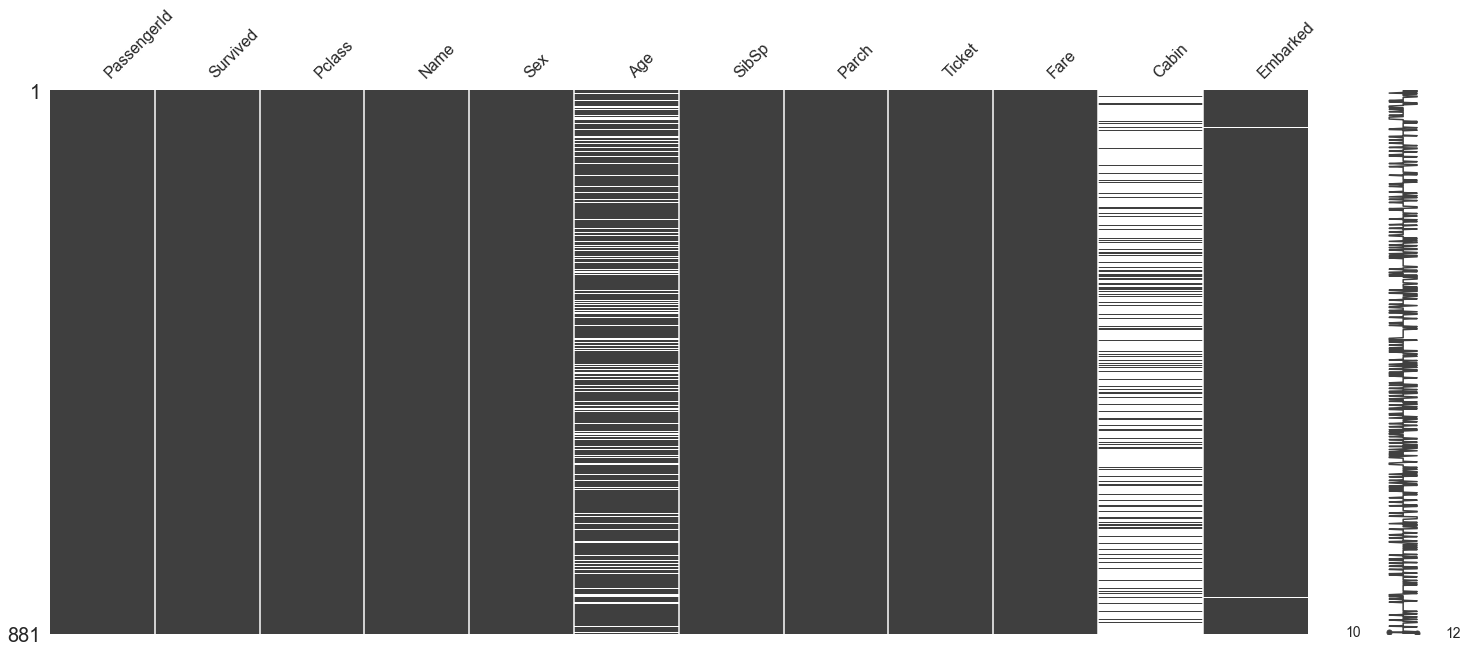

In [18]:
missingno.matrix(train)

<AxesSubplot:>

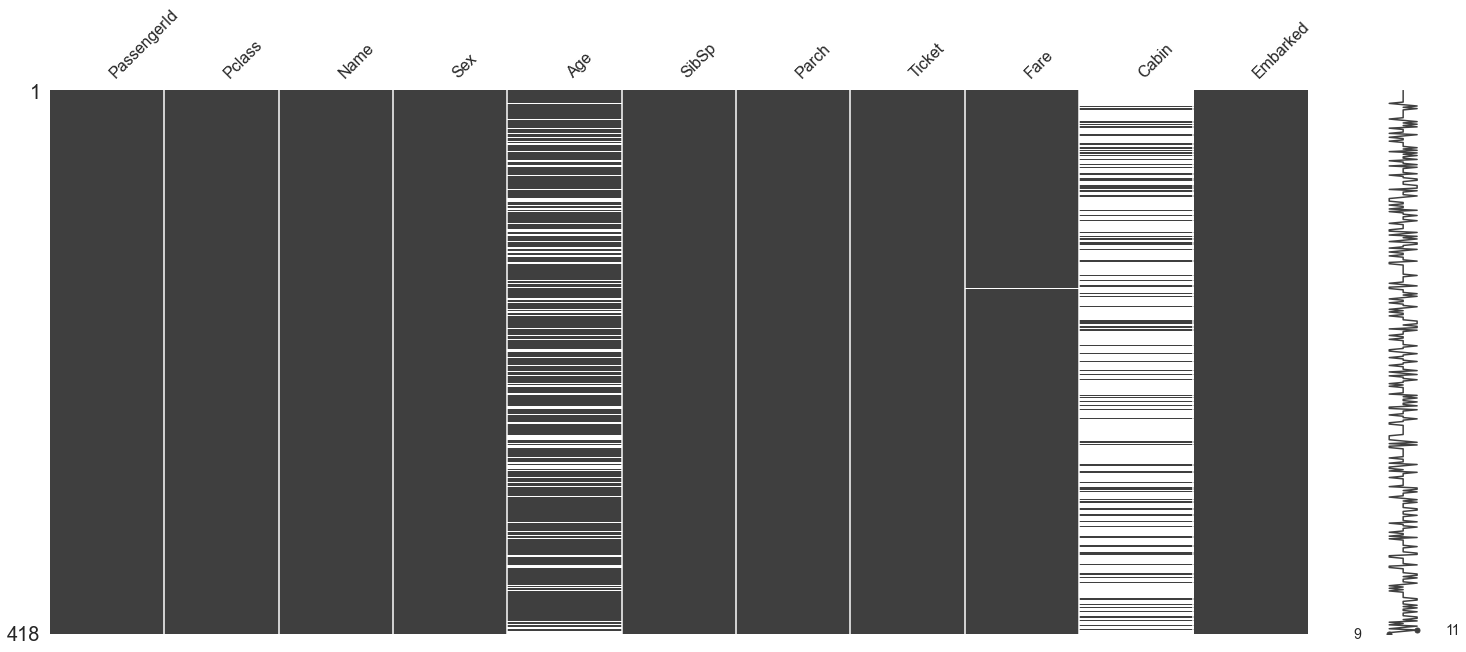

In [19]:
missingno.matrix(test)

<AxesSubplot:>

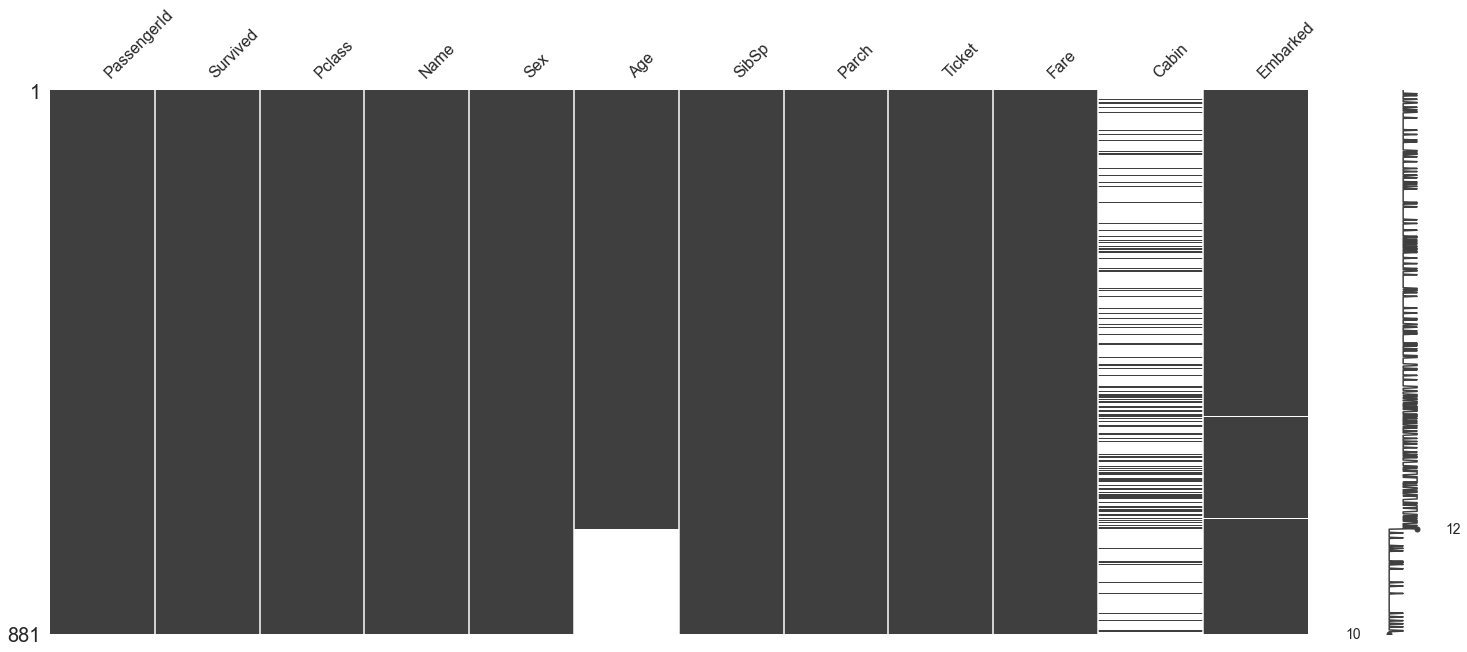

In [22]:
sorted = train.sort_values('Age')
missingno.matrix(sorted)

### 4. Feature analysis.

In the context of data analysis and statistics, variables are typically categorized into two main types: numerical and categorical.

Numerical Variables (Quantitative Variables): These variables represent measurable quantities and can be further classified into two subtypes:

Continuous Variables: These variables can take on any value within a certain range. There are no gaps between possible values. Examples include height, weight, temperature, and time.
Discrete Variables: These variables represent counts or finite values and can only take on specific numerical values. There are clear gaps between values. Examples include the number of siblings, number of pets, and number of cars owned.
Categorical Variables (Qualitative Variables): These variables represent categories or groups and can be further classified into two subtypes:

Nominal Variables: These variables represent categories with no inherent order or ranking. Examples include gender, ethnicity, and type of car.
Ordinal Variables: These variables represent categories with a clear order or ranking. Examples include education level (e.g., high school, bachelor's degree, master's degree) or satisfaction level (e.g., very satisfied, satisfied, neutral, dissatisfied, very dissatisfied).

## 4.1 Describing features. (Data Cleaning)

#### **4.2 Categorical:**
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order).
   > - **Cabin**
   > - **Embarked**(Port of Embarkation)
            C(Cherbourg)
            Q(Queenstown) 
            S(Southampton)
   > - **Sex**
            Female,
            Male.
   > - **Ticket** -Ticket number for passenger.
- **Ordinal**(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked).
   > - **Pclass** (A proxy for socio-economic status (SES)) 
            1(Upper)
            2(Middle) 
            3(Lower)
***
#### **4.3 Numerical:**
- **Discrete**
  >  - **Passenger ID**(Unique identifing # for each passenger)
  >  - **SibSp**
  >  - **Parch**
  >  - **Survived** (Our outcome or dependent variable)
            0,1.
- **Continous**
>  - **Age**
>  - **Fare**
***

***
**4.5 Feature Relationships.**

**4.6 Ask Questions about the data.**
> -**Name** (Name of the passengers.) 

#### 4.2 Categorical features

* 4.2.1 Cabin
* 4.2.2 Point of Embarkation
* 4.2.3 Sex
* 4.2.1 Pclass

##### 4.2.1 Cabin

In [1]:
train.['Cabin'].isnull().sum()

SyntaxError: invalid syntax (2192797798.py, line 1)

In [23]:
train['Cabin'] = train['Cabin'].astype(str)
test['Cabin'] = test['Cabin'].astype(str)


In [24]:
train[train['Cabin'] == 'A10']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
576,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.125,A10,C


In [25]:
cabin_counts = train.query('Cabin.notnull()').groupby('Cabin').size()

In [26]:
# Filtering out cabins with more than one entry
filtered_cabins = cabin_counts[cabin_counts > 1].index

# Filtering the original DataFrame to include only rows where 'Cabin' is in the filtered cabins list
filtered_train = train[train['Cabin'].isin(filtered_cabins)]

In [ ]:
filtered_train

In [27]:
cabin_counts.sort_values(ascending=False)

Cabin
nan        680
G6           4
B96 B98      4
C22 C26      3
E101         3
          ... 
C54          1
B39          1
C50          1
C49          1
A10          1
Length: 148, dtype: int64

In [28]:
train.query('Cabin.notnull()').groupby('Cabin')['Survived'].mean()

Cabin
A10    0.000000
A14    0.000000
A16    1.000000
A19    0.000000
A20    1.000000
         ...   
F38    0.000000
F4     1.000000
G6     0.500000
T      0.000000
nan    0.302941
Name: Survived, Length: 148, dtype: float64

##### 4.2.2 Point of Embarkation

In [29]:
train.Embarked.isnull().sum()

2

In [30]:
train.Embarked.value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
train.query('Embarked.notnull()').groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339117
Name: Survived, dtype: float64

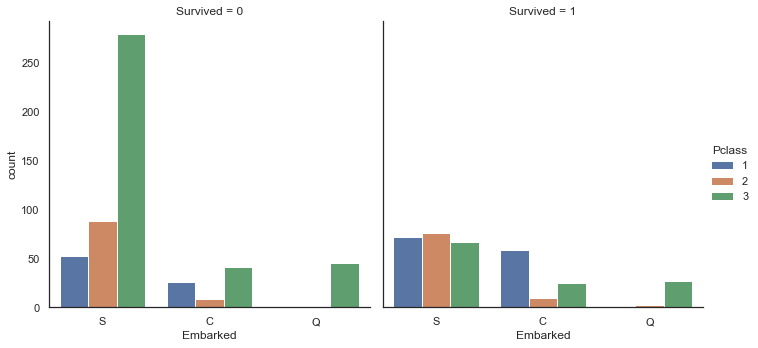

In [32]:
sns.catplot(data=train, x='Embarked', col='Survived', hue='Pclass' , kind='count' )

##### 4.2.3 Sex

In [33]:
train.Sex.isnull().sum()

0

In [34]:
survival_by_sex = train.groupby('Sex')['Survived'].mean()
survival_by_sex

Sex
female    0.747573
male      0.190559
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

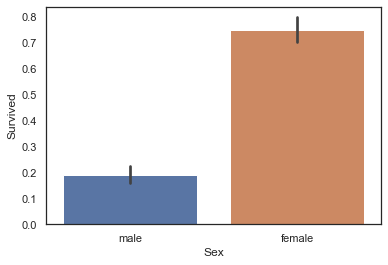

In [35]:
sns.barplot(data=train, x='Sex', y='Survived')

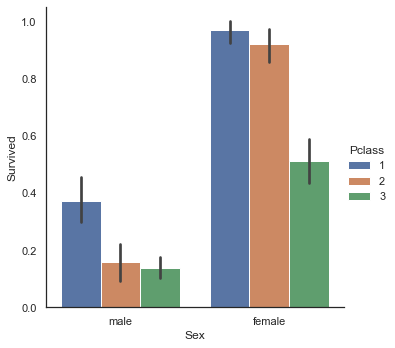

In [36]:
sns.catplot(data=train, x='Sex', y='Survived', hue='Pclass', kind='bar')

##### 4.2.4 Pclass.

In [37]:
train.Pclass.isnull().sum()

0

In [38]:
train.Pclass.value_counts()

3    484
1    213
2    184
Name: Pclass, dtype: int64

In [39]:
train[['Parch','SibSp','Age','Pclass','Survived']].groupby('Pclass').mean().sort_values('Survived', ascending=False)

,Parch,SibSp,Age,Survived
Pclass,,,,
1,0.333333,0.380282,38.499563,0.629108
2,0.380435,0.402174,29.877630,0.472826
3,0.369835,0.508264,25.140620,0.245868


In [40]:
Pclass_sur_mean = train.groupby('Pclass')['Survived'].mean()

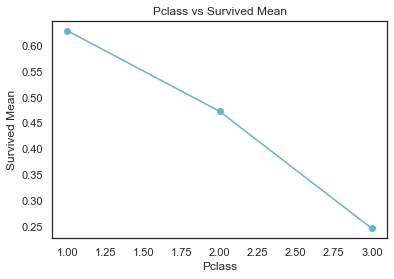

In [41]:
Pclass_sur_mean.plot(marker='o', linestyle='-', color='c')
plt.title('Pclass vs Survived Mean')
plt.xlabel('Pclass')
plt.ylabel('Survived Mean')

plt.show()

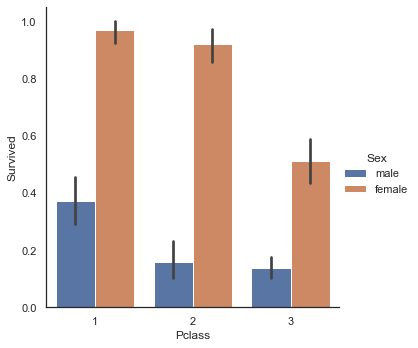

In [42]:
sns.catplot(data=train, x='Pclass', y='Survived', hue='Sex', kind='bar')

In [52]:
train[['Pclass', 'Sex']].groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

Sex,female,male
Pclass,,
1,92,121
2,76,108
3,141,343


In [53]:
men = train.query('Sex == "male"')['Survived']
men_ratio = sum(men) / len(men)
men_ratio

0.19055944055944055

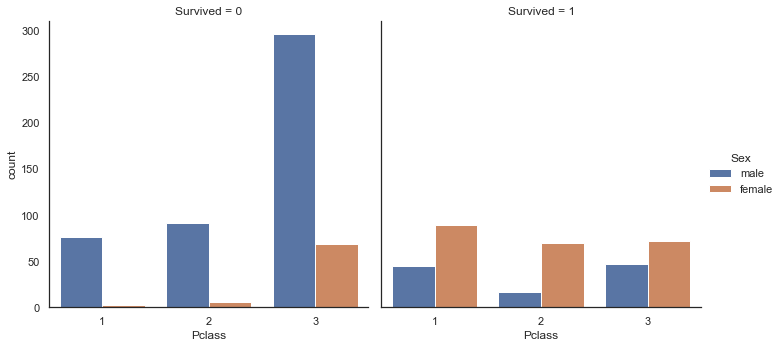

In [54]:
sns.catplot(data=train, x='Pclass', col='Survived', hue='Sex', kind='count')

#### 4.3 Numerical features.
* 4.3.1 Pearson corelation matrix.
* 4.3.2 Age
* 4.3.3 SibSp
* 4.3.4 Parch
* 4.3.5 Fare

##### 4.3.1 Pearson corelation matrix.

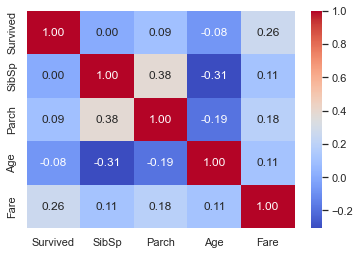

In [55]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

##### 4.3.2 Age.

In [56]:
train.Age.isnull().sum()

170

In [57]:
# ax = train.Age.plot(kind='hist', bins=20, title='Histogram of Age')

# ax.set_xlabel('')
# ax.set_ylabel('')

In [58]:
# ax = train.Age.plot(kind='kde', bins=20, title='Histogram of Age')

# ax.set_xlabel('')
# ax.set_ylabel('')

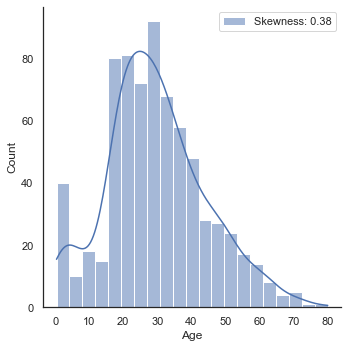

In [59]:
sns.displot(data=train, x='Age', kde=True, label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')

In [60]:
train.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

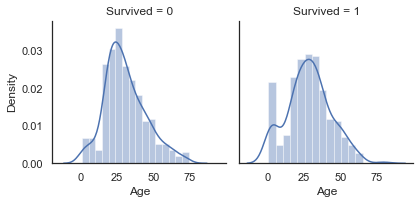

In [61]:
g = sns.FacetGrid(train, col='Survived')

g.map(sns.distplot, 'Age')

##### 4.3.3 SibSp.

In [62]:
train.SibSp.isnull().sum()

0

In [63]:
train.SibSp.value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

Text(0, 0.5, 'Count')

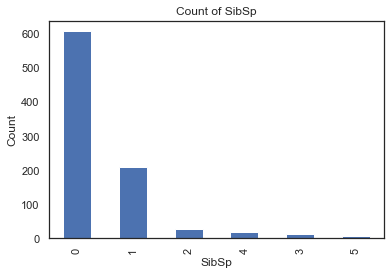

In [64]:
ax = train.SibSp.value_counts(dropna=False) \
.plot(kind='bar', title='Count of SibSp')
ax.set_xlabel('SibSp')
ax.set_ylabel('Count')

In [69]:
train[['SibSp', 'Sex', 'Survived']].groupby(['SibSp', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
SibSp,,
0,0.787356,0.168203
1,0.754717,0.310680
2,0.769231,0.200000
3,0.222222,0.000000
4,0.333333,0.083333
5,0.000000,0.000000


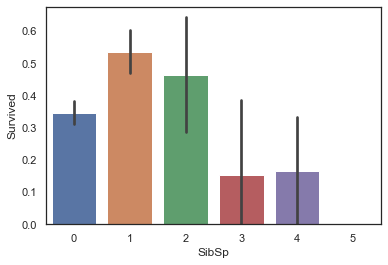

In [66]:
sns.barplot(data=train, x='SibSp', y='Survived')
plt.show()

#### 4.3.4 Parch.

In [70]:
train.Parch.isnull().sum()

0

In [71]:
train.Parch.value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [72]:
train.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.542857
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

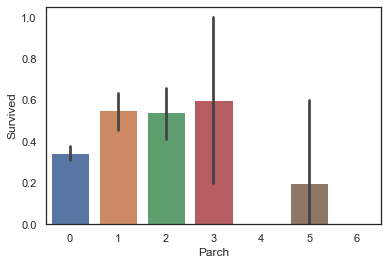

In [73]:
sns.barplot(data=train, x='Parch', y='Survived')
plt.show()

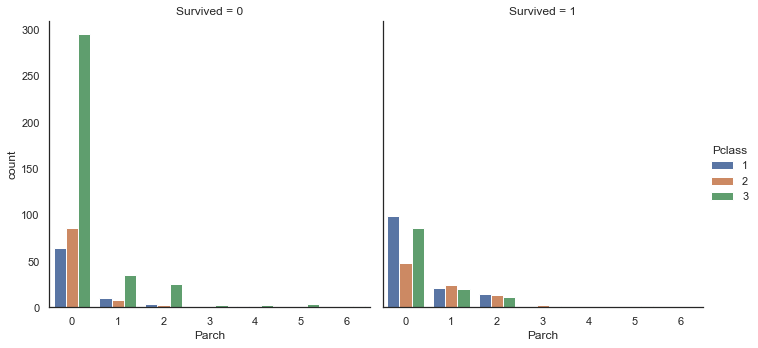

In [74]:
sns.catplot(data=train, x='Parch', col='Survived', hue='Pclass', kind='count')

##### 4.3.5 Fare

In [75]:
print('Highest Fare was:',train['Fare'].max())
print('Lowest Fare was:',train['Fare'].min())
print('Average Fare was:',train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 31.121565607264436


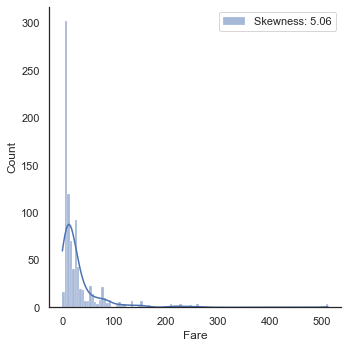

In [76]:
sns.displot(data=train, x='Fare', kde='True', label='Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')

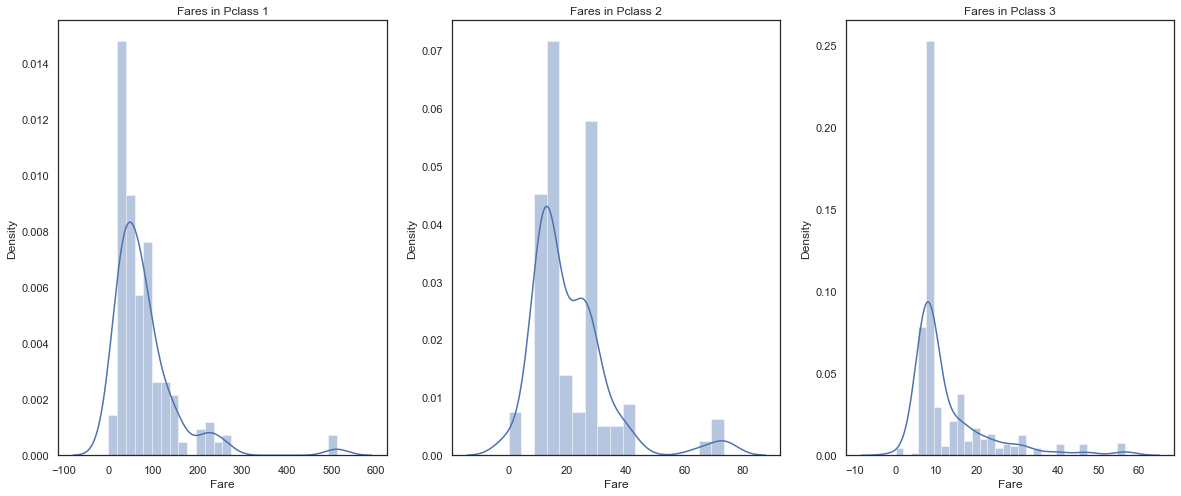

In [77]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train.query('Pclass == 1')['Fare'],ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train.query('Pclass == 2')['Fare'],ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train.query('Pclass == 3')['Fare'],ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

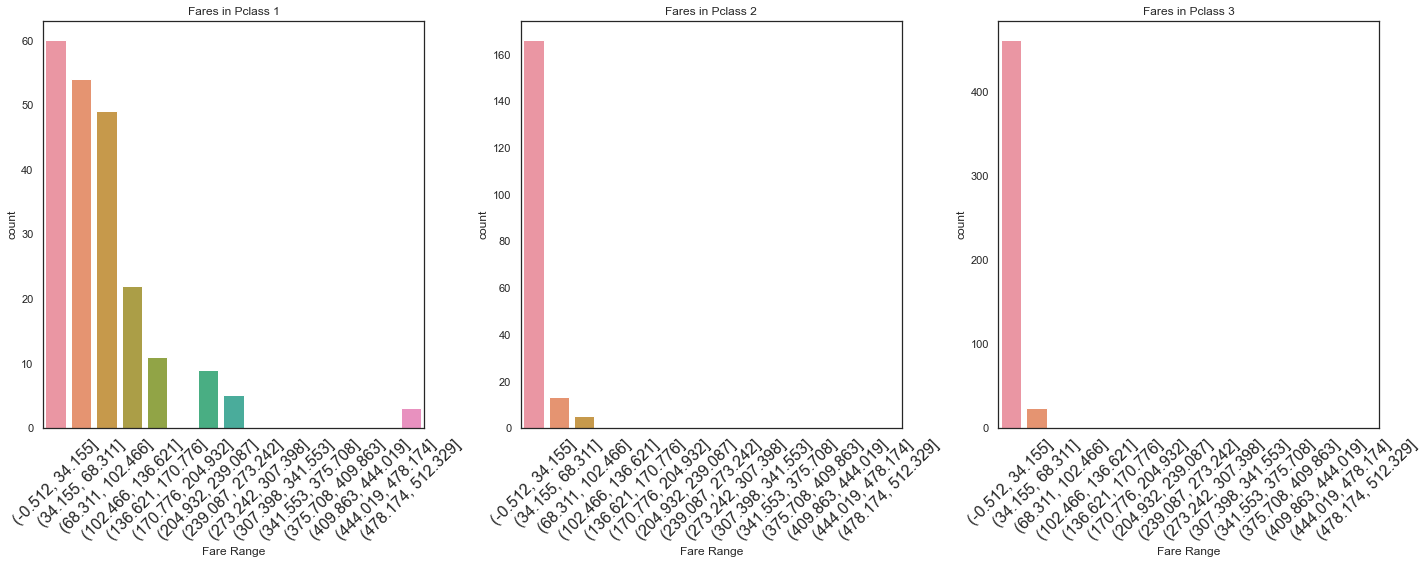

In [83]:
# Define the number of bins and the bin ranges
num_bins = 15
fare_ranges = pd.cut(train['Fare'], bins=num_bins)

# Create subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot countplot for each passenger class
for i in range(3):
    sns.countplot(x=fare_ranges[train['Pclass'] == i+1], ax=ax[i])
    ax[i].set_title(f'Fares in Pclass {i+1}')
    ax[i].set_xlabel('Fare Range')
    ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax[i].tick_params(axis='x', labelsize=16)  # Adjust label font size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### 4.5 Feature Relationships.

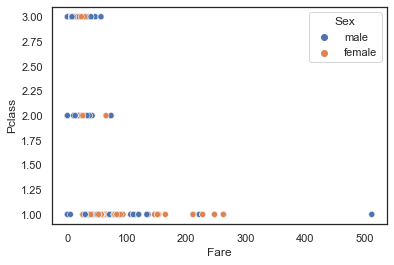

In [84]:
sns.scatterplot(x='Fare', y='Pclass',hue='Sex', data=train)

plt.show()



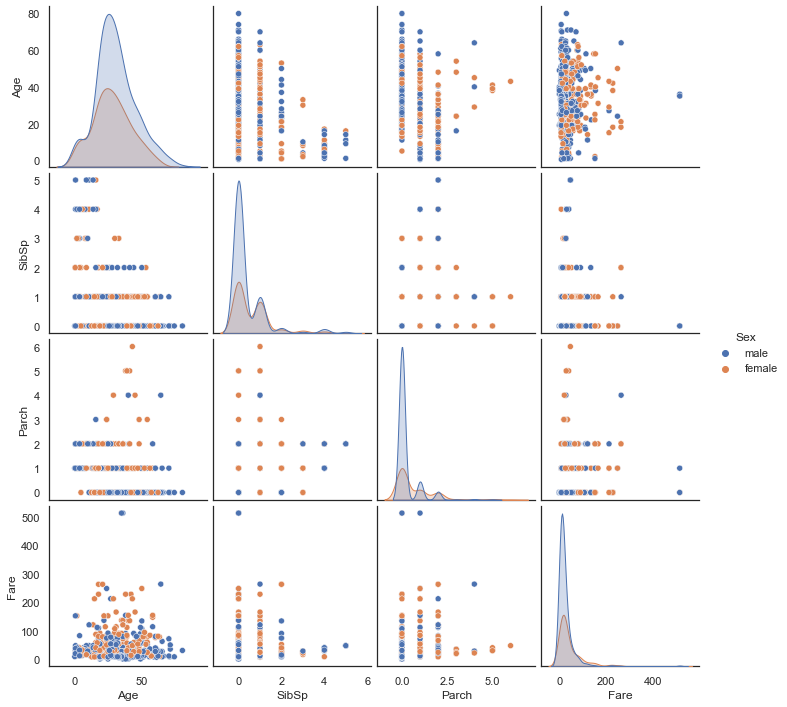

In [85]:
sns.pairplot(train, vars=['Age', 'SibSp', 'Parch', 'Fare'],
            hue='Sex')
plt.show()

In [86]:
train[['Age', 'SibSp', 'Parch', 'Fare']].dropna().corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.307129,-0.186457,0.110219
SibSp,-0.307129,1.000000,0.371317,0.094749
Parch,-0.186457,0.371317,1.000000,0.180072
Fare,0.110219,0.094749,0.180072,1.000000


#### 5.4 Ask Questions about the data.
* Try to post and answer a question you have about the data using plot or statistic.
* Find the mean age of all women from all classes.

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S


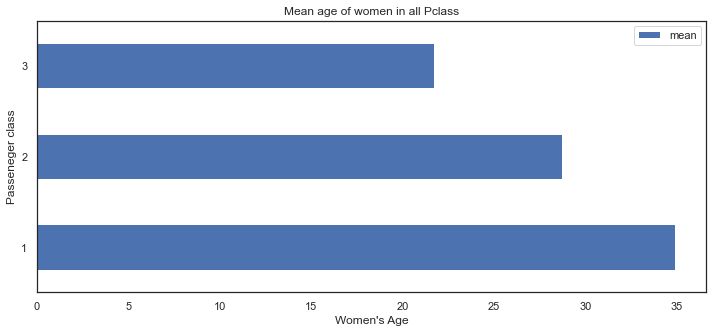

In [92]:
ax = train.query('Sex=="female"') \
.groupby('Pclass')['Age'] \
.agg(['mean']) \
.sort_values('mean', ascending=False) \
.plot(kind='barh', figsize=(12,5), title='Mean age of women in all Pclass')
ax.set_xlabel("Women's Age")
ax.set_ylabel('Passeneger class')
plt.show()

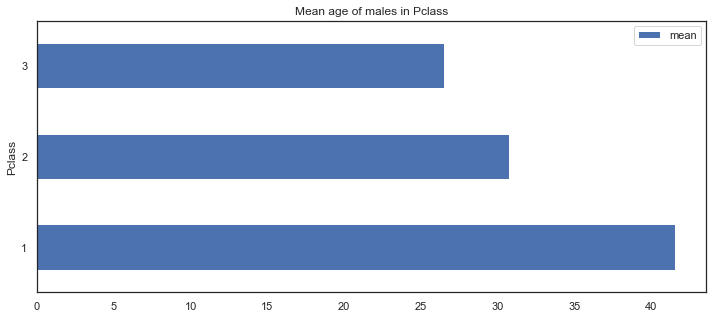

In [93]:
ax = train.query('Sex == "male"')\
.groupby('Pclass')['Age'] \
.agg(['mean']) \
.sort_values('mean',ascending=False) \
.plot(kind = 'barh', figsize = (12, 5), title = "Mean age of males in Pclass")

### 5. Data preprocesing
Data preprocesing is the process of getting our dataset ready for model training.
In this section we will perform the following preprocessing steps:
* 5.1 Concatenating train and test set
* 5.2 Drop and fill missing va in train and test datasets.
*      5.2.1 Embarked.
*      5.2.2 Fare.
*      5.2.3 Age.


#### 5.1 Concatenating train and test set.

In [95]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,nan,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,nan,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,nan,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,nan,S


In [96]:
combine = pd.concat([train,test], axis=0, ignore_index=True)

#### 5.2 Drop and fill missing va in train and test datasets.

##### 5.2.1 Embarked.

In [101]:
pd.crosstab([combine.Embarked, combine.Pclass],[combine.Sex, combine.Survived], margins=True).style.background_gradient(cmap='summer_r')
# ekstra param = normalize='index'

In [105]:
mode = combine.Embarked.dropna().mode()[0]
mode

'S'

In [103]:
combine['Embarked'] = combine.Embarked.fillna(mode)

##### 5.2.2 Fare.

In [106]:
combine.Fare.isnull().sum()

1

In [107]:
combine.query('Fare.isnull()')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,nan,S


In [114]:
combine.groupby(['Pclass', 'Parch', 'SibSp', 'Embarked']).Fare.median().unstack(fill_value=0)

Embarked                    C       Q          S
Pclass Parch SibSp                              
1      0     0       49.50420   0.000   30.00000
             1       78.26670  90.000   58.50000
             2        0.00000  90.000   51.47920
       1     0       61.97920   0.000   77.28750
             1      110.88330   0.000   80.75415
       2     0      112.07915   0.000   79.65000
             1        0.00000   0.000  120.00000
             2      262.37500   0.000    0.00000
             3        0.00000   0.000  263.00000
       3     1      262.37500   0.000    0.00000
       4     1        0.00000   0.000  263.00000
2      0     0       13.86250  12.350   13.00000
             1       25.86040   0.000   26.00000
             2        0.00000   0.000   73.50000
             3        0.00000   0.000   21.00000
       1     0        0.00000   0.000   23.00000
             1       37.00420   0.000   26.25000
             2        0.00000   0.000   33.00000
       2     0       37.00420   0.000   26.25000
             1       41.57920   0.000   46.37500
       3     0        0.00000   0.000   39.00000
             1        0.00000   0.000   23.00000
             2        0.00000   0.000   18.75000
3      0     0        7.22920   7.750    7.89580
             1       14.45420  15.500   14.50000
             2       21.67920  23.250   11.38540
             3        0.00000   0.000   16.92500
       1     0       13.41670   0.000   11.37500
             1       15.24580  15.500   15.90000
             2       19.25830   0.000    0.00000
             3        0.00000   0.000   22.02500
             4        0.00000  29.125   39.68750
       2     0       15.24580   7.750   16.30000
             1        0.00000   0.000   22.01250
             2        0.00000   0.000   34.37500
             3        0.00000   0.000   27.90000
             4        0.00000   0.000   31.27500
             5        0.00000   0.000   46.90000
             8        0.00000   0.000   69.55000
       3     0       19.25830   0.000    0.00000
             1        0.00000   0.000   34.37500
       4     0        0.00000   0.000   23.27085
             1        0.00000   0.000   27.90000
       5     0        0.00000  29.125   39.68750
             1        0.00000   0.000   31.33125
       6     1        0.00000   0.000   46.90000
       9     1        0.00000   0.000   69.55000

In [124]:
med_fare = combine.groupby(['Pclass', 'Parch', 'SibSp','Embarked']).Fare.median().loc[(3, 0, 0, 'C')]
combine['Fare'] = combine['Fare'].fillna(med_fare)

##### 5.2.3 Age.

In [126]:
age_by_pclass_sex = combine.groupby(['Sex', 'Pclass'])['Age'].mean()
age_by_pclass_sex

Sex     Pclass
female  1         37.244275
        2         27.499223
        3         22.185329
male    1         41.176133
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [ ]:

#     age_avg 	   = dataset['Age'].mean()
#     age_std 	   = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()
    
#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
#     dataset['Age'] = dataset['Age'].astype(int)
    
# train['CategoricalAge'] = pd.cut(train['Age'], 5)

# print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

In [127]:
age_avg = np.nanmean(combine['Age'])
age_std = combine['Age'].std()
age_null_count = combine['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
combine.loc[combine['Age'].isnull(), ['Age']] = age_null_random_list
combine['Age'] = combine['Age'].astype(int)

In [128]:
combine['CategoricalAge'] = pd.cut(combine['Age'], 5)
combine[['CategoricalAge','Survived']].groupby('CategoricalAge').mean()

,Survived
CategoricalAge,
"(-0.08, 16.0]",0.537037
"(16.0, 32.0]",0.358796
"(32.0, 48.0]",0.367816
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


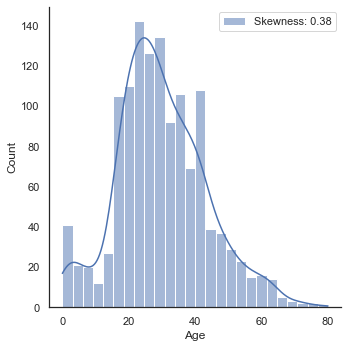

In [129]:
sns.displot(data=combine, x='Age', kde=True, label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')

####  6. Feature engineering.
*      6.1 "Title"
*      6.2 "Cabin"
*      6.3 "Age/Pclass"
*      6.4 Family Size and Is Alone features.

#### 6.1 Title.

In [ ]:
combine.loc[1, 'Name']

In [ ]:
combine['Title'] = [title.split(',')[1].split('.')[0].strip() for title in combine.Name]

In [ ]:
combine.Title.value_counts()

In [ ]:
# Convert to categorical values Title 
combine["Title"] = combine["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combine["Title"] = combine["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
combine["Title"] = combine["Title"].astype(int)

In [ ]:
combine.Title.value_counts()

In [ ]:
combine[['Title','Survived']].groupby('Title', as_index=False).mean().sort_values('Survived', ascending=False)

#### 6.2 Cabin.

In [ ]:
combine.query('Cabin != "nan"  & Pclass == 3')
combine['Cabin_letter'] = combine['Cabin'].str.extract(r'([A-Za-z])')
combine['Cabin_letter'].value_counts()


In [ ]:
combine.groupby('Cabin_letter')['Survived'].mean().sort_values(ascending=False)


In [ ]:
combine[['Cabin_letter', 'Sex']].groupby(['Cabin_letter', 'Sex']).size().unstack(fill_value=0)



In [ ]:
    combine.Cabin.fillna('0', inplace=True)
    combine.loc[combine.Cabin.str[0] == 'A', 'Cabin'] = 1
    combine.loc[combine.Cabin.str[0] == 'B', 'Cabin'] = 2
    combine.loc[combine.Cabin.str[0] == 'C', 'Cabin'] = 3
    combine.loc[combine.Cabin.str[0] == 'D', 'Cabin'] = 4
    combine.loc[combine.Cabin.str[0] == 'E', 'Cabin'] = 5
    combine.loc[combine.Cabin.str[0] == 'F', 'Cabin'] = 6
    combine.loc[combine.Cabin.str[0] == 'G', 'Cabin'] = 7
    combine.loc[combine.Cabin.str[0] == 'T', 'Cabin'] = 8

In [ ]:
sns.catplot(data=combine, x='Cabin', y='Survived', hue='Sex', kind='bar')

In [ ]:
combine = combine.drop(['PassengerId', 'Name', 'Cabin_letter','Ticket'],axis=1)

In [ ]:
sns.catplot(data=train, x='Sex', y='Age', col='Survived', hue='Pclass', kind='box')

#### 6.3 Age/Pclass.

In [ ]:
combine['Age'] = combine['Age'].astype(int)
combine['Pclass'] = combine['Pclass'].astype(int)

In [ ]:
combine['Age/Pclass'] = combine['Age'] / combine['Pclass']

#### 6.4 Family Size and Is Alone features.

In [ ]:
combine['Family_size'] = combine.SibSp + combine.Parch + 1


In [ ]:
combine['Family_size'].value_counts()

In [ ]:
combine['Is_Alone'] = 0
combine.loc[combine['Family_size']==1, 'Is_Alone'] = 1
combine = combine.drop(['SibSp', 'Parch', 'Family_size'],axis=1)

In [ ]:
combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

In [ ]:
combine.head()

## 7. Modeling.
* 7.1 Encoding categorical values.
* 7.2 Creating helper function to test all classifiers.
* 7.3 Applying ML models with evaluation (accuracy, f1, precision, recall).
    * Logistic Regression.
    * SVC Support Vector Machines.
    * Linear SVC.
    * SGD - Stochastic Gradient Decent.
    * K- Nearest Neigbours.
    * GNB - Gaussian Naive Base.
    * Perceptron.
    * DTC - Decision Tree CLassifier.
    * RF - Random Forest (ensable method).
    * Catboost.
    * Adaboost.
* 7.4 Compering all models.
* 7.5 Applying helper  function to test all classifiers.
* 7.6 Applying PCA, Select-K features.
* 7.7 Creating a pipeline with hyperparameter tuning selected models and cross validation.
* 7.8 Modeling with cross-validation for reference.
* 7.9 Hyperparameter tunning for 4 selected models.

##### 7.1 Encoding categorical values and creating bins for numerical.

In [ ]:
combine.head()


In [ ]:
combine = pd.get_dummies(combine, columns=['Embarked'], prefix='Em', dtype=int)
combine = pd.get_dummies(combine, columns=['Cabin'],prefix='Cab_l',dtype=int)

In [ ]:
combine.loc[combine['Fare'] <= 7.91, 'Fare'] = 0
combine.loc[(combine['Fare'] > 7.91) & (combine['Fare'] <= 14.454), 'Fare'] = 1
combine.loc[(combine['Fare'] > 14.454) & (combine['Fare'] <= 31), 'Fare']   = 2
combine.loc[combine['Fare'] > 31, 'Fare'] 							        = 3
combine['Fare'] = combine['Fare'].astype(int)

In [ ]:
    # Mapping Age
combine.loc[ combine['Age'] <= 16, 'Age'] = 0
combine.loc[(combine['Age'] > 16) & (combine['Age'] <= 32), 'Age'] = 1
combine.loc[(combine['Age'] > 32) & (combine['Age'] <= 48), 'Age'] = 2
combine.loc[(combine['Age'] > 48) & (combine['Age'] <= 64), 'Age'] = 3
combine.loc[ combine['Age'] > 64, 'Age'] = 4

In [ ]:
combine['Age/Pclass'] = pd.qcut(combine['Age/Pclass'], 5, labels=False)

In [ ]:
combine['Age/Pclass'] = combine['Age/Pclass'].map({0: 0, 1: 1, 2: 2, 3: 3, 4: 4}).astype(int)

In [ ]:
combine.head()

In [ ]:
sns.heatmap(combine.corr(),annot=True, fmt='.2f',cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
plt.title('Pearson Correlation of Features', y=1.05, size=15)
fig.set_size_inches(18,16)
plt.show()

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Age/Class and Age.

In [ ]:
train = combine[:len(train)]
test = combine[len(train):]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
features = train.drop('Survived', axis=1)
labels = train['Survived']
s_test = test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

#### 7.2 Creating helper function to test all classifiers.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
PERF_FORMAT_STRING ="\tAccuracy: {:>0.{round}f}\tPrecison: {:>0.{round}f}\tRecall: {:>0.{round}f}\tF1: {:>0.{round}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"
def test_classifier(clf, dataset, feature_list, folds = 100):   
    labels = dataset['Survived']
    features = dataset.drop('Survived', axis=1)
    cv = StratifiedShuffleSplit(n_splits=folds, test_size=0.3, random_state=42)
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for train_idx, test_idx in cv.split(features, labels):
        train_features = features.iloc[train_idx]
        train_labels = labels.iloc[train_idx]
        test_features = features.iloc[test_idx]
        test_labels = labels.iloc[test_idx]

        clf.fit(train_features, train_labels)
        predictions = clf.predict(test_features)

        for prediction, truth in zip(predictions, test_labels):
            if prediction == 1 and truth == 1:
                true_positive+=1
            elif prediction == 0 and truth == 0:
                true_negative+=1
            elif prediction == 1 and truth == 0:
                false_positive+=1
            elif prediction == 0 and truth == 1:
                false_negative+=1

    try:
        all_predictions = true_positive + true_negative + false_positive + false_negative
        accuracy = (true_positive + true_negative) / all_predictions
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1 = 2.0 * (precision * recall)  / (precision + recall)
        print("\n")
        print(clf)
        print(PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, round=4))
        print(RESULTS_FORMAT_STRING.format(all_predictions, true_positive, false_positive, false_negative, true_negative))
    except ZeroDivisionError:
        print("Warning: Got a divide by zero when trying out:", clf)

### 7.3 Applying ML models with evaluation (accuracy, f1, precision, recall).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score
PERF_FORMAT_STRING =" \tAccuracy: {:>0.{round}f}\tF1_score: {:>0.{round}f}\tPrecision: {:>0.{round}f}\tRecall: {:>0.{round}f} "

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_acc = lr_clf.score(X_train, y_train)
lr_f1_score = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print(PERF_FORMAT_STRING.format(lr_acc, lr_f1_score, lr_precision, lr_recall, round = 4))


In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
svc_acc = svc_clf.score(X_train, y_train)
svc_f1_score = f1_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
print(PERF_FORMAT_STRING.format(svc_acc, svc_f1_score, svc_precision, svc_recall, round = 4))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_acc = knn_clf.score(X_train, y_train)
knn_f1_score = f1_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall =recall_score(y_test, knn_pred)
print(PERF_FORMAT_STRING.format(knn_acc, knn_f1_score, knn_precision, knn_recall, round = 4))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_pred = gnb_clf.predict(X_test)
gnb_acc = gnb_clf.score(X_train, y_train)
gnb_f1_score = f1_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
print(PERF_FORMAT_STRING.format(gnb_acc, gnb_f1_score, gnb_precision, gnb_recall, round = 4))

In [ ]:
from sklearn.linear_model import Perceptron

p_clf = Perceptron()
p_clf.fit(X_train, y_train)
p_pred = p_clf.predict(X_test)
p_acc = gnb_clf.score(X_train, y_train)
p_f1_score = f1_score(y_test, p_pred)
p_precision = precision_score(y_test, p_pred)
p_recall = recall_score(y_test, p_pred)
print(PERF_FORMAT_STRING.format(p_acc, p_f1_score, p_precision, p_recall, round = 4))

In [ ]:
from sklearn.svm import LinearSVC
lsvc_clf = LinearSVC()
lsvc_clf.fit(X_train, y_train)
lsvc_pred = lsvc_clf.predict(X_test)
lsvc_acc = lsvc_clf.score(X_train, y_train)
lsvc_f1_score = f1_score(y_test, lsvc_pred)
lsvc_precision = precision_score(y_test, lsvc_pred)
lsvc_recall =recall_score(y_test, lsvc_pred)
print(PERF_FORMAT_STRING.format(lsvc_acc, lsvc_f1_score, lsvc_precision, lsvc_recall, round = 4))

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_pred = lsvc_clf.predict(X_test)
sgd_acc = lsvc_clf.score(X_train, y_train)
sgd_f1_score = f1_score(y_test, sgd_pred)
sgd_precision = precision_score(y_test, sgd_pred)
sgd_recall =recall_score(y_test, sgd_pred)
print(PERF_FORMAT_STRING.format(sgd_acc, sgd_f1_score, sgd_precision, sgd_recall, round = 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = gnb_clf.score(X_train, y_train)
dt_f1_score = f1_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
print(PERF_FORMAT_STRING.format(dt_acc, dt_f1_score, dt_precision, dt_recall, round = 4))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = dt_clf.predict(X_test)
rf_acc = gnb_clf.score(X_train, y_train)
rf_f1_score = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print(PERF_FORMAT_STRING.format(rf_acc, rf_f1_score, rf_precision, rf_recall, round = 4))

In [ ]:
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
cb_pred = dt_clf.predict(X_test)
cb_acc = gnb_clf.score(X_train, y_train)
cb_f1_score = f1_score(y_test, cb_pred)
cb_precision = precision_score(y_test, cb_pred)
cb_recall = recall_score(y_test, cb_pred)
print(PERF_FORMAT_STRING.format(cb_acc, cb_f1_score, cb_precision, cb_recall, round = 4))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
ab_pred = dt_clf.predict(X_test)
ab_acc = gnb_clf.score(X_train, y_train)
ab_f1_score = f1_score(y_test, ab_pred)
ab_precision = precision_score(y_test, ab_pred)
ab_recall = recall_score(y_test, ab_pred)
print(PERF_FORMAT_STRING.format(ab_acc, ab_f1_score, ab_precision, ab_recall, round = 4))

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [ ]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
classifiers.append(AdaBoostClassifier())

cv1_results = []

for classifier in classifiers:
    cv1_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold))
    
cv1_mean = []
cv1_std = []

for result in cv1_results:
    cv1_mean.append(result.mean())
    cv1_std.append(result.std())

cv1_res = pd.DataFrame({'Cross Validation Mean': cv1_mean, 'Cross Validation Std': cv1_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'K-Nearest Neighbours','Gausian Naive Bayes','Perceptron', 'Linear SVC','Stochastic gradnient descent', 'Decision tree', 'Random Forest','CatBoost', 'AdaBoost']})




#### 7.4 Compering all models

In [ ]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'SVC Support Vector Machines', 'Linear SVC', 'SGD - Stochastic Gradient Decent',
                       'K- Nearest Neigbours', 'GNB - Gaussian Naive Base', 'Perceptron', 'DTC - Decision Tree CLassifier',
                       'RF - Random Forest', 'Catboost', 'Adaboost'],
                      'Accuracy': [lr_acc, svc_acc, lsvc_acc, sgd_acc, knn_acc, gnb_acc, p_acc, dt_acc, rf_acc, cb_acc, ab_acc],
                      'F1':[ lr_f1_score, svc_f1_score, lsvc_f1_score, sgd_f1_score, knn_f1_score, gnb_f1_score, p_f1_score, dt_f1_score, rf_f1_score,
                       cb_f1_score, ab_f1_score],
                      'Precision': [lr_precision, svc_precision, lsvc_precision, sgd_precision, knn_precision, gnb_precision, p_precision, 
                       dt_precision, rf_precision, cb_precision, ab_precision],
                      'Recall':[ lr_recall, svc_recall, lsvc_recall, sgd_recall, knn_recall, gnb_recall, p_recall, dt_recall, rf_recall,
                       cb_recall, ab_recall ]}
                     )
models.sort_values('F1', ascending=False)

In [ ]:
cv1_res.head().sort_values(by='Cross Validation Mean', ascending=False)

#### 7.5 Applying helper function to test top 3 classifiers.

In [ ]:
features_list = X_train
test_classifier(classifiers[1], train, features_list)

In [ ]:
test_classifier(classifiers[2], train, features_list)

In [ ]:
test_classifier(classifiers[0], train, features_list)

#### 7.6 Applying PCA, Select-KFeatures techniques

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
pca_components = pca.components_
first_pca = pca.components_[0]



In [ ]:
features.shape

In [ ]:
features_list = features.columns

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
kbest = SelectKBest(f_classif, k=10)
kbest.fit_transform(X_train, y_train)

selected_features_indices = kbest.get_support(indices=True)
features_selected = [features_list[i] for i in selected_features_indices]
features_selected

In [ ]:
test_classifier(lr_clf, train, features_selected)

#### 7.7 Creating a pipeline with hyperparameter tuning for selected models and cross validation.

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# select = SelectKBest()
# lr = LogisticRegression()


# steps = [('feature_select', select),
#          ('classifier', lr)]

# param_grid = {'feature_select__k': [4, 8, 12],
#              'classifier__C': [0.001, 0.1, 1, 10],
#              'classifier__penalty': ['l1', 'l2'],
#              'classifier__solver': ['liblinear', 'lbfgs', ],
#              'classifier__class_weight': [None, 'balanced'],
#              'classifier__multi_class': ['ovr', 'multinomial'],
#              'classifier__tol': [1e-4, 1e-3],
#              'classifier__max_iter': [100, 1000],
#              'classifier__warm_start': [True, False]}
# sss = StratifiedShuffleSplit(100, test_size=0.3, random_state=43)
# pipe = Pipeline(steps)
# gs = GridSearchCV(pipe, param_grid, cv=sss, scoring='f1')
# gs.fit(X_train, y_train)
# clf = gs.best_estimator_
# gs.best_score_

In [ ]:
# test_classifier(clf, train, features_selected)

##### The best parameters for Logistic Regression found by SearchGridCV:
Pipeline(steps=[('feature_select', SelectKBest(k=2)),
                ('classifier',
                 LogisticRegression(C=0.001, class_weight='balanced',
                 multi_class='ovr', solver='liblinear',
                 warm_start=True))])

GridSearchCV results: 
* Accuracy: 0.7868	
* Precison: 0.7077	
* Recall: 0.7601	
* F1: 0.7329

The results before gridsearchcv:
* acc: 0.819805
* precision:0.781818
* recall: 0.754386
* f1: 0.811321

The results of hyperparamter tunning are for some reason worse than before. It mightbe due to narrowing down the parameters befeore running the GridsearchCV due to cpu performance issued. For some reason I can't use multiple cores and I'm unable to manage full GridSearch with just one core.
We will omit those results for now.

#### 7.8 Modeling with cross-validation for reference.

In [ ]:
# Modeling step with cross validation to Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []

for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = kfold))
    
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'Cross Validation Mean':cv_means,'Cross Validation Std': cv_std,'Algorithm':["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})



In [ ]:
cv_res.head(10).sort_values(by='Cross Validation Mean', ascending=False)

In [ ]:
sns.barplot(data=cv_res, x='Cross Validation Mean', y='Algorithm', order=cv_res.sort_values(by='Cross Validation Mean', ascending=False)['Algorithm'])


#### 7.9 Hyperparameter tunning for 4 best models.

 AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVl on 4 cpu.

In [ ]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

In [ ]:
gsadaDTC.best_score_

In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance", "exponential"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

#### 7.10 Plot learning curves

Learning curves are a good way to see the overfitting effect on the training set and the effect of the training size on the accuracy.

In [ ]:
train_scores = np.array([[0.8, 0.85, 0.88],
       [0.75, 0.82, 0.87],
       [0.72, 0.80, 0.86],
       [0.70, 0.78, 0.85],
       [0.68, 0.75, 0.84]])
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_mean

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



In [ ]:
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

SVC and Adaboost classifiers tend to overfit the training set. According to the growing cross-validation curves GradientBoosting, Adaboost SVC  and ExtraTrees could perform better with more training examples.
GradientBoostinges classifrrs seem to better generalize the prediction since the training and cross-validation curves are close together.

#### 7.11 Feature importance of tree based classifiers.

In [ ]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:20]
        g = sns.barplot(y=X_train.columns[indices][:20],x = classifier.feature_importances_[indices][:20] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [ ]:
test.drop(labels=["Survived"],axis = 1,inplace=True)
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")

ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
ensemble_results

In [ ]:
g= sns.heatmap(ensemble_results.corr(),annot=True)

 prediction seems to be quite similar for the 5 classifiers.

The 5 classifiers give more or less the same prediction but there are some differences. 
Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote. 

### 7.12 Ensemble modeling.
I choosed a voting classifier to combine the predictions coming from the 5 classifiers.

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=1)

votingC = votingC.fit(X_train, y_train)

### 8. Prediction.
#### 8.1 Predict and Submit results.

In [ ]:
test_survived = pd.Series(votingC.predict(test), name='Survived')
test_survived

In [ ]:
submission_preds = votingC.predict(test)

df = pd.DataFrame({'PassengerId': testId.values,
                  'Survived': submission_preds,})

df

In [ ]:
df.to_csv('Submission.csv', index=False)